$\newcommand{\bnabla}{\boldsymbol{\nabla}}$
$\newcommand{\eexp}[1]{\text{e}^{#1}}$
$\newcommand{\di}[0]{\text{d}}$
$\newcommand{\bs}[1]{\boldsymbol{#1}}$
$\newcommand{\ode}[2]{\frac{\di {#1}}{\di {#2}}}$
$\newcommand{\oden}[3]{\frac{\di^{#1} {#2}}{\di {#3}^{#1}}}$
$\newcommand{\odel}[2]{\di {#1}/\di {#2}}$
$\newcommand{\odeln}[3]{\di^{#1} {#2}/\di {#3}^{#1}}$
$\newcommand{\pde}[2]{\frac{\partial {#1}}{\partial {#2}}}$
$\newcommand{\pden}[3]{\frac{\partial^{#1} {#2}}{\partial {#3}^{#1}}}$
$\newcommand{\pdel}[2]{\partial_{#2} {#1}}$
$\newcommand{\pdenl}[3]{\partial^{#1}_{#3} {#2}}$
$\newcommand{\divr}[1]{\vec\nabla \cdot {#1}}$
$\newcommand{\divrb}[1]{\boldsymbol{\nabla} \cdot {#1}}$
$\newcommand{\grad}[1]{\vec \nabla {#1}}$
$\newcommand{\gradb}[1]{\boldsymbol\nabla {#1}}$
$\newcommand{\curl}[1]{\vec\nabla \times {#1}}$
$\newcommand{\curlb}[1]{\boldsymbol{\nabla}\times\boldsymbol{#1}}$
$\newcommand{\lapl}[0]{\vec\nabla^2}$
$\newcommand{\laplb}[0]{\boldsymbol{\nabla}^2}$
$\newcommand{\ci}[0]{\text{i}}$
$\newcommand{\unit}[1]{\boldsymbol{\hat{#1}}}$
$\newcommand{\thrfor}[0]{\quad\Rightarrow\quad}$
$\newcommand{\red}[1]{\textcolor{red}{#1}}$
$\newcommand{\blue}[1]{\textcolor{blue}{#1}}$
$\newcommand{\mage}[1]{\textcolor{magenta}{#1}}$
$\newcommand{\with}[0]{\quad\text{with}\quad}$
$\newcommand{\thrfor}[0]{\quad\Rightarrow\quad}$
$\newcommand{\andeq}[0]{\quad\text{and}\quad}$
$\newcommand{\oreq}[0]{\quad\text{or}\quad}$

In [1]:
from IPython.display import Image, display, YouTubeVideo
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import interactive
interactive(True)
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 100  # for crisper figures later

*Readings:*

* *Morin 4.1-4.2, beginning of 4.3*
* *phase space: Gollub & Baker 2.1*

# Expectations

## Remember

* The simple harmonic oscillator (SHO) equation, $\ddot x + \omega^2_0 x = 0$.
* For the pendulum, $\omega^2_0 = g/\ell$; for the mass+spring system, $\omega^2_0 = k/m$.
* Solutions to the SHO are in the form of $A\eexp{\ci(\omega_0 t + \phi)}$, or any equivalent form.
* A phase space diagram of an oscillation is a plot of the oscillation on a ($\dot x, x$) graph, with the trace parameterized by time.
* Solutions to a linear ODE satisfy the superposition principle.
* The generic form of the DHO, $\ddot x + 2\gamma \dot x + \omega_0^2x = 0$,
* the definitions of $\omega_0^2$ and $\gamma$ for the mass-spring system, and what they represent physically (oscillations and damping),
* the three regimes, and how $\omega_0^2 - \gamma^2$ determines the regime.

## Understand

* What the linear regime means.
* What linearizing entails.
* That an SHO is the combination of an inertial process (e.g., mass inertia, magnetic induction...) and of a restoring process (e.g., spring stiffness, capacitance...)
* How we can linearize also in an unstable case, although the regime is only valid in the early instants of the instability.
* Similarities in Physics: if two ODEs have the same form, the mathematical solutions will also look the same.
* The three terms entering Newton's 2nd law for a damped oscillator, and how to cast it in the generic form $\ddot x + 2\gamma \dot x + \omega_0^2x = 0$,
* How adopt-an-exponential in the forced case leads to knowing the oscillation's frequency, amplitude and phase shift with respect to the forcing,

## Create and apply

* From a set of two initial conditions (e.g. initial position **and** initial velocity, for the pendulum system), how to compute the complete evolution of the system.
* How to apply knowledge from one type of oscillator (e.g., pendulum) to obtain the solutions of a difference kind of oscillator (e.g., mass+spring).
* The "adopt-an-exponential" method.
* ... and the worked out examples and tutorials

Before I introduce the main oscillator of this chapter and the two after that (i.e., the mass+spring system), let me introduce you to another oscillator we will use often: the pendulum.
See below (Jupyter) or at https://youtu.be/QPpatmnS3bs.

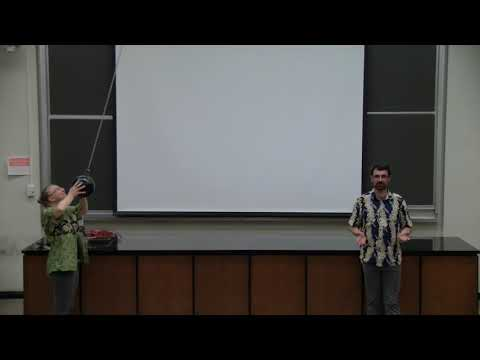

In [2]:
YouTubeVideo('QPpatmnS3bs', width=800, height=300)

# Simple harmonic oscillators (SHOs)

A simple harmonic oscillator is a system where a restoring force, i.e., a force that always tries to bring back (restore) the system to its equilibrium, is the only one to balance inertia ($ma$).
Most notably, there is no friction in the system.
Restoring and inertia are trapped in a dance where restoring brings the system to equilibrium, but inertia makes it overshoot, bringing restoring back into action, etc.

## Equations of motion

Consider the spring-mass system in the PhET simulation below (and at https://phet.colorado.edu/en/simulation/hookes-law). An ideal spring (that is, a weightless, dissipationless spring) of stiffess $k > 0$ [in N.m$^{-1}$, or kg.s$^{-2}$], attached to a fixed wall on one end, and an objet of mass $m$ [kg] on the other.

In [3]:
%%html
<iframe src="https://phet.colorado.edu/sims/html/hookes-law/latest/hookes-law_en.html" width="800" height="600" scrolling="no" allowfullscreen></iframe>

Let $x$ be the position of the centre of mass of the object. $x=0$ at rest, $x\neq 0$ otherwise.
Let's also assume the mass can slide on the surface without friction, and that the spring is "perfect" (that is, weightless and can oscillate without dissipation).

An equivalent system is the one I am presenting below (Jupyter notebook) and at https://youtu.be/cMjn04ivOfE.

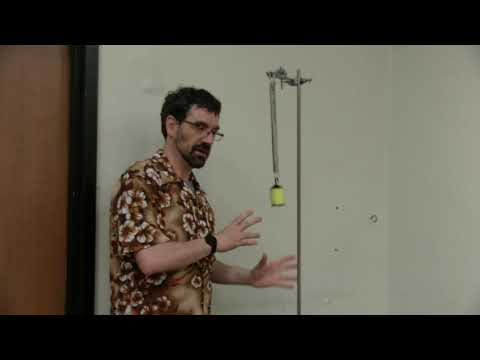

In [4]:
YouTubeVideo('cMjn04ivOfE', width=800, height=300)

We now pull the mass to position $x = x_0 \neq 0$ and hold it there.
If $x_0$ is "not too big", the spring will not deform or break.
In this case, the force of the spring on the mass is (Hooke's law)
$$F = -kx_0.$$

* The negative sign means that the force is a **restoring force** (i.e., it tends to bring back the oscillator to its state of rest; here, the sate of rest is when the mass is at its equilibrium position).
* $k$ being constant, the force is proportional to the distance from equilibrium position. It makes this force linear: if I double the distance, I double the force.
    See a comment in the second lecture notes (which I did not mention in class then, but hopefully will do this time) for a discussion about how to make it non-linear.
    Later, we will talk about the pendulum, for which the process of linearizing is more transparent.

Let us now release our spring.
The motion of the object has to obey Newton's second law, which constitutes an equation of motion.
$$ ma = F\ \Rightarrow\ m\ddot{x} = -kx.$$
The equation above is a second-order Ordinary Differential Equation (ODE), which we saw before.

Let 
\begin{equation}
    \label{eq:SHO}
    \omega_0^2 = \frac{k}{m} \ \Rightarrow \ \ddot{x} + \omega_0^2 x = 0.
\end{equation}

**Quick unit check:** Because $k$ is in kg.s$^{-2}$ and $m$ is in kg, $\omega_0$ is in s$^{-1}$ in SI units.

Why did I feel the need to add the subscript "$0$" in $\omega_0$?
In an SHO, there is indeed only one $\omega$ so why bother? Because soon, we will add a bit of friction, and the situation will be more complicated.

## General Solutions

From the tutorial that followed the second lecture, we know that the solution to the equation above has many equivalent forms, namely,

* $x(t) = A\cos(\omega_0 t + \phi)$,
* $x(t) = B \sin(\omega_0 t + \psi)$,
* $x(t) = C \cos(\omega_0 t) + D \sin (\omega_0 t)$,
* $x(t) = E \eexp{\ci \omega_0 t} + E^* \eexp{-\ci \omega_0 t}$,  (see tutorial 2)
* $x(t) = \text{Re}(G \eexp{\ci \omega_0 t})$.

Note that there are always two free parameters:

* $A$ and $\phi$,
* $B$ and $\psi$,
* $C$ and $D$,
* $E$ is two-dimensional: it has a pair of real and imaginary parts in its Cartesian description, or a pair of magnitude and phase in its polar description, whichever is more convenient,
* $G = 2E$ (see tutorial 2 again).

It reflects the fact that our solution is entirely determined by two pieces of information: the initial positions and velocities, $x_0$ and $v_0$.
It also reflects the fact that a mathematician teaching you about ODEs will tell you that a linear $n^\text{th}$-order equation (here, $2^\text{nd}$-order) has $n$ (here, $2$) linearly-independent solutions (these facts are not independent from one another).

We will call this type of motion Simple Harmonic Motion (SHM).
The abbreviations then read: a SHO describes SHM.

Of all these possible forms, the ones that will prove the most useful are the last two, with the complex exponentials.
The reason is not particularly obvious for the SHO, because all forms are quite convenient to handle, but sticking to exponentials will prove invaluable when equations become more complicated.
So, let's take a step back, pretend we never heard of oscillations during the last lecture, and let us be falsely naive.

We will use what I (and only I, as far as I know) call the "***adopt-an-exponential***" method.
We will "test" if the function
$$x(t) = c\eexp{rt}, \with (c, r) \in \mathbb C^2,$$
can be a solution, and under which conditions.
And to know that, we will plug it in the equation of motion, and let it "adopt" the exponential, i.e., tell us which $r$ would work.

Note that $r\in \mathbb C$, but unlike $\ci \omega$, it is not purely imaginary and may have a real part.
The letter $r$ stands for "root".

Plugging in, $\ddot x = r^2 c \eexp{rt}$, and eqn. \eqref{eq:SHO} becomes
$$(r^2 + \omega_0^2)x(t) = 0.$$
So, either $r^2 =- \omega_0^2$, or $x(t)=0$, and we want it to be true all the time.
Now, the latter cannot be zero *all the time*, otherwise... well, there would be no oscillation to study.
Therefore, it has to be
$$r^2 = -\omega_0^2\thrfor r = \pm\sqrt{-1}\omega_0 = \pm \ci \omega_0.$$
The $\pm$ is important: it tells us that two linearly independent solutions can satisfy this equation, and that the general solution has to be a linear combination of those:
$$x(t) = c_1\eexp{\ci\omega_0 t} + c_2\eexp{-\ci\omega_0 t}.$$
The ODE has adopted two exponentials, and is excited to see them grow up (or, more accurately, oscillate).

To complete the adoption process, the *two* initial conditions will tell us what $c_1$ and $c_2$ are.
We've seen it in Tutorial #2: to keep $x$ purely real, we need $c_2 = c_1^*$, and if $x_0$ and $v_0$ are the initial position and velocity, then
$$c_1 = \frac12\left(x_0 - \ci\frac{v_0}{\omega_0}\right),$$
with the amplitude $A = 2|c_1| = \sqrt{x_0^2 + v_0^2/\omega_0^2}$ and an initial phase defined by $\cos\phi = x_0/A$ and $\sin\phi = -v_0/(\omega_0 A)$.

Let us plot this, with the option to change various parameters:

In [5]:
def plot_SHO(k, m, x0, v0):
    """ Function that computes and plots position and velocity
    INPUT:
    k: spring stiffness [N/m, kg/(s**2)]
    m: mass [kg]
    x0: initial position [m]
    v0: initial velocity [m/s]
    OUTPUT: plot of the mass position and velocity"""
    
    omega0 = (k/m)**.5  # [rad/s] angular frequency
    T0 = 2*np.pi/omega0  # [s] period
    c = 0.5*(x0 - 1j*v0/omega0)
    A = 2*abs(c)  # [m] position amplitude
    phi = np.angle(c)  # phase
    
    t = np.linspace(0., 0.6, 128)  # time array, from 0 to 0.6 s, 128 points
    x = A*np.cos(omega0*t + phi)  # position [m]
    v = -A*omega0*np.sin(omega0*t + phi)  # [m/s] velocity

    # let's plot
    ftsz = 13
    plt.figure(dpi=100)
    
    # plotting the position x(t)
    ax1 = plt.gca()
    ax1.plot(t, x, 'b')  # plotting the position x
    ax1.set_xlabel('time [s]', fontsize=ftsz) 
    ax1.set_ylabel(r'position $x$ [m]', color='b', fontsize=ftsz)
    ax1.tick_params('y', colors='b')  # color for y-axis is blue

    # annotation to highlight the position amplitude
    ax1.axhline(A, color='b', linestyle='-.')  # the x=x0 mark
    ax1.text(T0*1.11, A, '$A = {0:1.0f}$ mm'.format(A*1000),
             verticalalignment='top', horizontalalignment='left',
             color='b')

    ax1.axhline(0., color='k')  # draw the zero-axis as horizontal line

    # plotting the velocity v(t)
    ax2 = ax1.twinx()  # creates another set of y-axis on the right
    ax2.plot(t, v, 'r')  # plotting the velocity v
    ax2.set_ylabel(r'velocity $v$ [m/s]', color='r', fontsize=ftsz)
    ax2.tick_params(colors='r')  # color for other y-axis is red
    ax2.set_xlim([t.min(), t.max()])

    # annotation to highlight the velocity amplitude
    ax2.axhline(-A*omega0, color='r', linestyle='-.')  # the v=v0 mark
    ax2.text(0.6*T0, -A*omega0,
             r'$|\omega A| \approx {0:1.1f}$ cm/s'.format(A*omega0*100),
             verticalalignment='bottom', horizontalalignment='left',
             color='r')

    # annotation to highlight the period
    ax2.axvline(T0, color='k', linestyle='-.')  # the t=T mark
    ax2.annotate(text='', xy=(0., 4e-2), xytext=(T0, 4e-2),
                 arrowprops=dict(arrowstyle='<|-|>'))  # the double arrow
    ax2.text(0.6*T0, 4e-2, r'$T_0 = 2\pi/\omega_0 = {0:.2f}$ s'.format(T0),
             verticalalignment='center', horizontalalignment='center',
             backgroundcolor='w', fontsize=ftsz)
    
    # plt.show()
    
    return

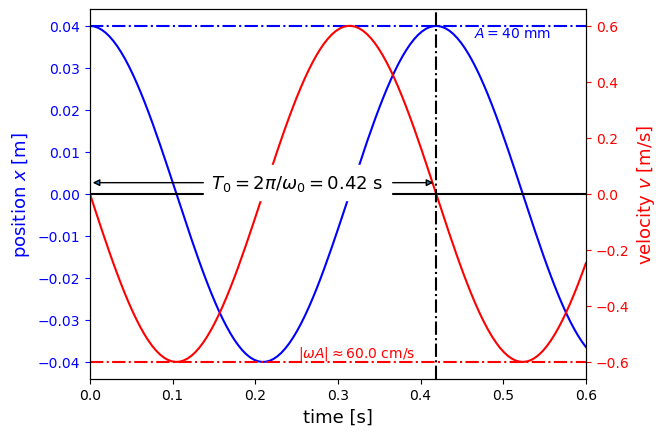

In [6]:
plot_SHO(k=180., m=0.8, x0=4e-2, v0=0.)  # default plot for pdf export

In [7]:
from ipywidgets import interact, FloatSlider
interact(plot_SHO, k=180, m=0.8, x0=FloatSlider(min=-0.1, max=0.1, step=1e-2, value=4e-2), v0=FloatSlider(min=-0.5, max=0.5, step=1e-2, value=0.))

interactive(children=(IntSlider(value=180, description='k', max=540, min=-180), FloatSlider(value=0.8, descrip…

<function __main__.plot_SHO(k, m, x0, v0)>

I have already said it, but let me repeat it: careful about the phase: it is tempting to use $\arctan$, $\arcsin$ or $\arccos$ to say $\phi=\dots$, but one vlue for these functions usually corresponds to two possible arguments in the $[0, 2\pi)$ interval.
You always need two pieces of info to settle what the phase is.

# Phase space representation of an oscillation

A phase space plot, or "phase portrait", or "phase diagram", is a plot of velocity or momentum versus position, parameterized by time.  These plots are used extensively in the study of ordinary differential equations, dynamical systems, studies of chaos, and so on. In these notes, we want to develop techniques for calculating and interpreting phase space plots.

Suppose we have a particle undergoing sinusoidal motion according to $x=A\cos\omega_0 t$, with period $T_0 = 2\pi/\omega_0$.
Its velocity is $\dot x = -\omega_0 A\sin\omega_0 t$. Say, for example, its a mass on a spring.  We can plot the times series for $x$ and $v$ like below.

In [16]:
omega0 = 1.0  # angular frequency
T0 = 2*np.pi/omega0  # period
t = np.arange(0, 3*T0, np.pi/100)  # time array
A = 1.0  # amplitude
phi = np.pi/4  # initial phase
x = A*np.cos(omega0*t + phi)  # position
v = -omega0*A*np.sin(omega0*t+phi)  # velocity

xnorm = x/A  # necessary only if we change A
vnorm = v/A/omega0  # necessary only if we change A or omega

In [17]:
def plot_xv_t():
    """ First figure shows time series of x and v """
    plt.plot(t/T0, xnorm, label=r'$x/A$')
    plt.plot(t/T0, vnorm, '--', label=r'$v/(A\omega_0)$')
    plt.legend()
    plt.title('Time series')
    plt.xlabel(r'$t/T_0$')
    plt.xlim(t[0]/T0, t[-1]/T0)
    plt.grid()
    return

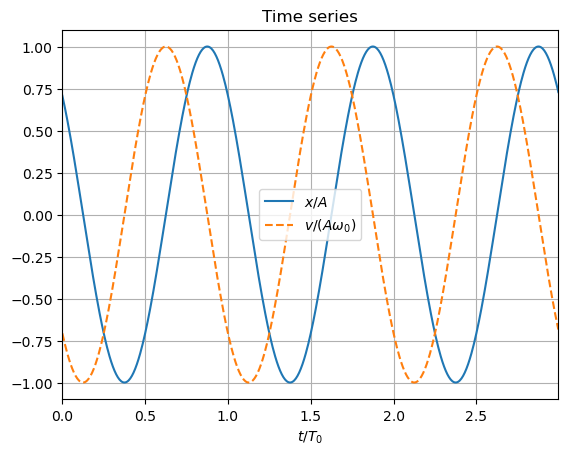

In [18]:
plot_xv_t()

This plot contains a lot of redundant information and it is not necessarily easy to see a clear relationship between $x$ and $v$.

The phase portrait takes $x$ and $v$ as coordinates in the plane, and plots the parametric curve
$$\left(x(t),v(t)\right)=\left(A\cos\omega_0 t,-\omega_0 A\sin\omega_0 t\right),$$
which describes an ellipse with horizontal and vertical axes.
Let's plot it.

In [19]:
def plot_phase_SHM():
    """ Second figure shows phase diagram """ 
    plt.plot(xnorm, vnorm)
    plt.xlabel(r'$x/A$')
    plt.ylabel(r'$v/(\omega_0 A)$')
    plt.arrow(xnorm[0], vnorm[0], xnorm[1]-xnorm[0], vnorm[1]-vnorm[0], width=0.05)
    plt.grid()
    plt.title('Phase portrait')
    plt.xlim([-1.1, 1.1])
    plt.ylim([-1.2, 1.1])
    plt.axhline(0., color='k')  # $v=0$ axis
    plt.axvline(0., color='k')  # $x=0$ axis
    plt.axis('equal')
    return

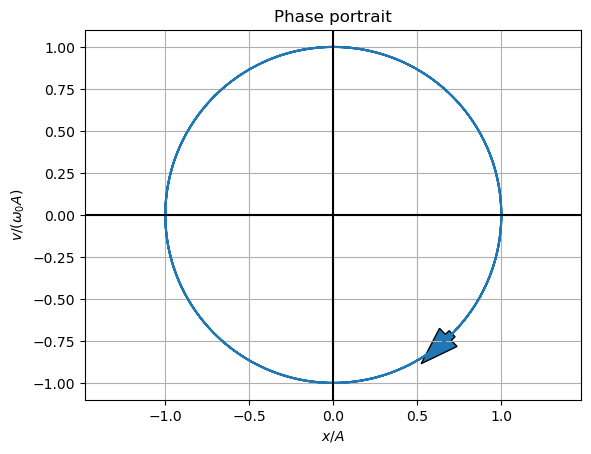

In [20]:
plot_phase_SHM()

This curve describes the whole motion because it's periodic.
With a bit of practice, the following pieces of info are more legible than on the time series plots:
* Points where the extension $x$ is extremal are points where $v=0$, and points of maximum velocity occur at $x=0$.
* It proceeds clockwise (negative direction), as indicated by the arrow. It highlights that $v$ precedes $x$ in phase: when $v/(\omega_0 A) = -1$ (its minimal value), we will have $x/A = -1$ one-quarter cycle later.

The plot above looks like a circle in the $(x/A, \dot x/(\omega_0 A))$ coordinates, or an ellipse when the axes aren't stretched as arbitrarily.
To see why, recall that $x^2 = A^2\cos^2(\omega_0 t)$ and $\dot x^2 = \omega_0^2 A^2\sin^2(\omega_0 t)$. Thus,
$$\frac{x^2}{A^2}+\frac{\dot x^2}{\omega_0^2 A^2}=\cos^2(\omega_0 t)+\sin^2(\omega_0 t) =1,$$
which is the equation of an ellipse in the ($x, \dot x$) plane, or a circle in the ($x/A, \dot x/(\omega_0 A)$) space.

We will often plot systems of interest in phase space, as a way of summarizing their behaviour.

# The pendulum

Now that we have nailed the undamped mass+spring system, let's consider a different oscillator, the pendulum.
In doing so, I want to show you two things:
* An illustration of a non-linear oscillator, and how to linearize the system.
* That the equations are generic, the particular physics of a system being contained in the coefficients involved in the equations. In other words, if you can do it with a mass+spring system, you can do it with any other SHO.
* A foray into unstable behaviour and non-linear phenomena.

## Equation of motion

Consider a mass $m$ at the end of a pendulum of length $\ell$, released from near its downward position, as sketched below (Morin, fig. 4.2). See also the PhET simulation that follows (and at https://phet.colorado.edu/en/simulation/pendulum-lab; just do the intro to see what we're talking about).

<img src="Morin_4_2.png" alt="Drawing" style="width: 150px;"/>

In [13]:
%%html
<iframe src="https://phet.colorado.edu/sims/html/pendulum-lab/latest/pendulum-lab_en.html" width="800" height="600" scrolling="no" allowfullscreen></iframe>

Since the mass at the end of the pendulum undergoes circular motion, it makes sense to use polar coordinates, and the angle $\theta$ as our variable in particular.
Recalling from the first lecture that the azimuthal acceleration is $2\dot r\dot theta + r\ddot\theta$.
Here, we can simplify the expression because the motion is strictly circular (i.e., $r = \ell$ and $\dot r = \ddot r = 0$).
The azimuthal, a.k.a. tangential, acceleration, is therefore
$$a_\theta = \ell \ddot \theta.$$

The mass $m$ is subjected to two forces: 

* the tension force $\vec T$ that attaches it to the pendulum, oriented along the pendulum arm towards the centre and perpendicular to the trajectory,
* the weight, $\vec F = -mg\unit z$.

Projected *along the tangential direction of the trajectory*, $\vec T\cdot \unit\theta = 0$, and the weight is $F_\theta = - m g\sin\theta$ (see sketch below). 

<img src="pendulum_sketch.png" alt="Drawing" style="width: 300px;"/>

This means that $F_\theta = -mg\sin\theta$, and
\begin{equation}
    \label{eq:PendulumNL}
    m\ell\ddot\theta=-mg\sin\theta \oreq \boxed{\ddot\theta=-\frac g\ell\sin\theta}.
\end{equation}
The above equation is a 2nd order homogeneous ODE, but it is **nonlinear** because of the $\sin\theta$ ("If I double $\theta$, I double the acceleration... not").
This means we can't solve the equation by adopting an exponentia. (You can try... but there is not much you can do about $\sin(A\eexp{bt})$.)
Later on we will learn how to solve this equation, but for now we are going to consider a restricted version of this pendulum, one that we have been discussing before: the *linear version*.

## Linear pendulum: simple harmonic motion

Indeed, I promised I would stick to linear phenomena, which I compared with *gentle physics*, the physics of small deviations from equilibrium.
But here, we made not such approximation and $\theta$ can swing wildly.
So, let's do it: let's assume $\theta\ll 1$ and ***linearize*** this equation.

For small $\theta$ we have $\sin\theta\approx\theta$ (from the Taylor expansion) and under this approximation the equation becomes (replacing $\approx$ with $=$)
\begin{equation}
    \label{eq:PendulumLin}
    \ddot\theta+\frac g\ell\theta=0.
\end{equation}
So in this special case (for small angle) we get a **linear** 2nd-order homogeneous ODE.  This we know how to solve, and if we introduce $\omega_0 = \sqrt{g/\ell}$, it starts looking more andmore like the mass and spring system.

Before linearization, $\sin\theta$ was a nonlinear function of $\theta$, and by linearizing the system we can guarantee that the solutions are simpler to find and satisfy the **superposition principle**, namely, that a linear combination of two solutions (i.e., a superposition) is also a solution.
We can write the same thing with equations, namely, if $\theta_1(t)$ and $\theta_2(t)$ are both solutions to eq. \eqref{eq:PendulumLin}, even if they have different amplitudes and phases, then their sum is also a solution:
$$(\ddot\theta_1 + \ddot\theta_2) + \omega_0^2(\theta_1 + \theta_2) = (\underbrace{\ddot\theta_1 + \omega_0^2\theta_1}_{{} = 0}) + (\underbrace{\ddot\theta_2 + \omega_0^2\theta_2}_{{} = 0}) = 0.$$

You can't say the same about the non-linear solutions: even if we had
$$\ddot\theta_1 + \omega_0^2\sin\theta_1=0 \andeq \ddot\theta_2 + \omega_0^2\sin\theta_2=0,$$
there would be the fact that in general,
$$\sin(\theta_1 + \theta_2) \neq \sin\theta_1 + \sin\theta_2 = -\ddot\theta_1 - \ddot\theta_2,$$
so we couldn't say that $\theta_1 + \theta_2$ was also a solution to the non-linear ODE: solutions to non-linear ODEs do ***not*** follow the superposition principle in general.

Let's now discuss how the form of equation \eqref{eq:PendulumLin} is exactly the equation we had before for the mass on a spring which gave SHM. Now, it is about the oscillation of the angle $\theta$ at angular frequency $\omega_0=\sqrt{g/\ell}$ instead of the oscillation of the mass position $x$ at angular frequency $\sqrt{k/m}$.
Besides the phenomenon being described and the physics in it however, this case is equivalent to the spring case, as long as $\theta\ll1$.
But recall that a spring has its own linear regime of small $x$, "small" being compared to... well, by how much $x$ has to be to start seeing prominent non-linear phenomena such as maximum compression or permanent deformation.
The pendulum makes it more simple to define what the linear and the non-linear regimes are, is all.

Therefore, exactly like for the mass + spring system, we have linear solutions of the form 
$$\theta=\theta_0\cos\omega_0 t + \frac{\dot\theta_0}{\omega_0} \sin\omega_0 t.$$


Pendulums have a surprisingly interesting history, considering how simple they are. The following fun facts are a regurgitation of https://en.wikipedia.org/wiki/Pendulum#History and should motivate you to read about it:

* Galileo noticed that the period of a pendulum was independent of amplitude as long as it was small by looking at a giant chandelier hanging off of Pisa's cathedral's ceiling (you can look up pictures of this pendulum, apparently it still exists), and independent of mass.
* Huygens used it to make very nice clocks that only deviated by 15 seconds per day instead of the 15 minutes of the previous technology.
* People used it to measure $g$ on various points of Earth, leading to a very accurate measure of the shape of the Earth very early on.

## Larger oscillations: the non-linear pendulum

### General angles

We will revisit this case in the lecture about chaos, but for now, let's just go further in the Taylor expansion of $\sin\theta$, that is, 
$$\sin\theta = \theta - \frac{\theta^3}{3!} + O(\theta^5).$$
Let's truncate this expansion to the first two terms and plug it back in eqn. \eqref{eq:PendulumNL} to obtain
$$\ddot\theta + \frac g\ell\left(\theta - \frac{\theta^3}6\right)=0.$$
Note that I did not use the notation $\omega_0$ here.
This is because I want $\omega_0$ to retain its special meaning as the angular frequency of linear oscillations.
Because we don't have it anymore, and because the angular frequency of oscillations is now different, I prefer to keep $\sqrt{g/\ell}$.

This equation is actually quite famous, and not just about pendulums.
It is called the undamped, undriven Duffing equation.
If it were damped and driven, it would exhibit chaotic behaviour (see e.g. https://en.wikipedia.org/wiki/Duffing_equation).

For the free version of it (and by "free", I mean not damped nor driven), there is an analytical formula for the period $T$ for any $\theta_{max}$ for the full eqn. \ref{eq:PendulumNL}, although it does not involve solving the ODE, but rather conservation of energy (see Morin, exercise 4.23 on p. 124).
Because I want to postpone energy considerations to a little later, I will just write down this solution, which is
$$T = \sqrt{\frac{8 \ell}{g}} \int_0^{\theta_{max}}\frac{\di \theta}{\sqrt{\cos\theta - \cos\theta_{max}}}.$$

At this point in the course, it's more of a fun fact.

### Starting from the upward position

Now consider a trickier case: a pendulum released from its upward position. We know that the system will not oscillate about a nearby point, because it is unstable.
So what do we do?

Using an FBD one finds $F_{\theta} = -mg\sin \theta$ again, Newton's 2nd law is still $\ddot\theta = - (g/\ell)\sin\theta$.
I will use 
$$\sigma = \sqrt{g/\ell}$$
from now on, because this quantity will still hold a special importance, though not as an angular frequency.

We are starting near the angle $\theta=\pi$.
Because we like our small numbers, let's define a new angle for which the initial angle is zero.
That is, define
$$\theta=\pi-\delta.$$
Then, $\sin\theta = \sin(\pi-\delta) = -\sin\delta$ (easy to see if you draw a circle), $\dot\theta=-\dot\delta$ and $\ddot\theta=-\ddot\delta$. Newton's 2nd law becomes
$$\ddot \delta - \sigma^2 \sin\delta = 0.$$
Notice the specific difference compared to the pendulum "down" case.
In that case, we had a "$+$" sign in between the terms.
Now we have a "$-$" sign, which will make all the difference.

Note that $\delta=0$ is a possible steady solution of the equation above.
This is what it means to be unstable: it could stay there forever if nothing were to perturb it, but the smallest perturbation will dramatically throw it off-balance. 
This is opposite to the $\theta = 0$ case, where the smallest perturbation will just create the smallest oscillations, trying to bring the system back to its equilibrium position.
But this is also in opposition to any other $\theta \neq 0$ or $\theta \neq \pi$ case: those aren't associated with any $\ddot \theta = 0$ situation, they are simply out-of-equilibrium (which is different from unstable).

We can linearize the solution again to small $\delta$'s, which yields
\begin{equation}
\ddot\delta - \sigma^2 \delta = 0.
\label{eq:unstableODE}
\end{equation}
The regime of validity of this approximation will not be as wide as the stable case (pendulum down): there, if $\theta \ll 1$ at all times during one oscillation, it will stay that way for ever and the SHO equation will also be valid forever.
In the present case, the pendulum will eventually go wayyy down and back wayyyyy up, and the linearization will eventually lose its validity.
But the linearization should be valid for a few initial moments.

To solve eq. \eqref{eq:unstableODE}, we notice that it is a 2nd order, linear, homogeneous ODE and therefore, we can attempt to adopt an exponential again: try $x=c e^{r t}$ and solve for $r$.
Doing so gives $r=\pm \sigma$.
The exponent is now real in the "up" pendulum, where it was complex in the "down" pendulum. We will *not* see oscillations.

We can now write the solutions as exponential functions, where
\begin{align}
\delta(t) & = A e^{\sigma t} + Be^{-\sigma t}\nonumber\\
          & = C\cosh(\sigma t) + D\sinh(\sigma t)\label{eq:sinhcosh}\\
          & = E\cosh(\sigma t + \phi_1),\nonumber
\end{align}
etc., are all equivalent.
The coefficients are again determined by the initial conditions.

We cannot start at exactly $\delta = 0$, because in theory it would stay there for ever.
Instead, consider an initial angle $\delta|_{t=0} = \delta_0 \ll 1$ but $\neq 0$.
Let's also consider $\dot\delta|_{t=0} = 0$ for simplicity.
Using the 2nd form above (eq. \ref{eq:sinhcosh}), we find
$$\dot\delta(t) = \sigma C\sinh (\sigma t) +\sigma D\cosh (\sigma t)$$
and plugging in the initial conditions, we find (recall $\cosh(0) = 1$ and $\sinh(0)=0$)
$$\delta_0=C \andeq 0=D.$$

So, 
$$\delta(t)=\delta_0\cosh \sigma t=\frac{\delta_0}2\left(e^{\sigma t}+e^{-\sigma t}\right).$$
In this case, the solutions are exponentially growing as $t$ increases: a small perturbation grows arbitrarily large with a time scale of $\sqrt{\ell/g}$ called the "growth rate" (Covid modellers would call it $R_0$). This case is *linearly unstable* (because this is all very linear).
But recall that the motion exponentially moves away from the axis only in the initial moments, when the angle is still small.
Beyond that, there be nonlinear dragons.

And what about the phase plot of this motion? Stay tuned...

# Adding damping

## Equations of motion

The mass+spring system of the previous section was not very dissipative. But had I waited 20 minutes or so, we would have seen the mass gradually come to rest.
To see the mass come to rest due to friction within a reasonable amount of time, we can simply increase the friction by plunging a similar mass in water. 
This is the video below (Jupyter) or at https://youtu.be/LxMMEMv5fhg.

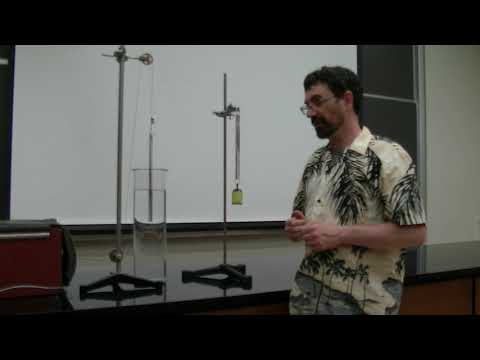

In [14]:
YouTubeVideo('LxMMEMv5fhg', width=800, height=300)

Before I dig into the math, you should watch the following video of the two things that can happen when oscillators are damped (that is, a lot of damping and a little damping), and how the situation that is in-between, i.e., neither very damped nor weakly damped, is worth consideration by itself (it is the one that stops first). I will quantify all of my statements later, but before I do, watch the video so that you at least know what I want to get at.
For those of you who only use the pdf, the video is on YouTube: https://www.youtube.com/embed/99ZE2RGwqSM

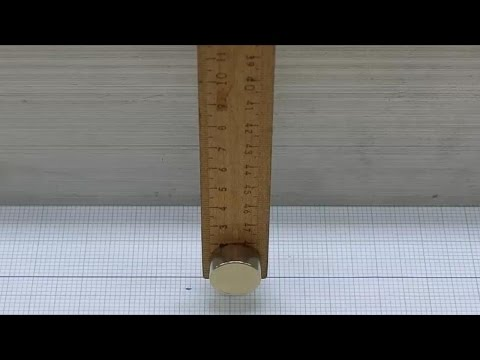

In [15]:
YouTubeVideo('99ZE2RGwqSM', width=800, height=300)

Let's go back to our favourite oscillator, the mass and spring system. As we have seen in the previous sections, to adapt it to any other damped oscillator would be mathematically equivalent.

Now, on top of the force of the spring on the mass, we assume a more realistic case in which the mass is feeling some friction proportional to its velocity:
$$ F_d = -bv = -b\dot x,$$
where the subscript $d$ stands for "damping", and $b$ is in kg.s$^{-1}$.

The negative sign indicates that the force acts on the direction, opposite to that of the motion, and the proportionality is the simplest mathematical form one could think of.
This is a **linear approximation** again ("Double the velocity, double the force"). 
A non-linear option could have been for example for a much faster-moving object, like a car on a highway,
for which a frictional force proportional to $v^2$ would be more appropriate.
"Our" $-bv$ approximation is sufficient to describe a lot of **gently-moving** physical systems, such as tiny ($<1$ mm) drops falling in air, or the mass oscillating in water for the video above.

***
*As an aside, the Stokes' force describes the drag force, experienced by a sphere of radius $R$ moving with velocity $V$ in a viscous fluid of mass density $\rho$ and dynamic viscosity $\eta$. Its expression is $-bv$ with $b = 6\pi \eta R$, and is valid when $VR\rho/\eta \ll 1$. Our mass is not a sphere, and this non-dimensional number I just wrote is not that small in the demo, and yet this $-bv$ model applies to a surprisingly large range of motions. For more info, see https://en.wikipedia.org/wiki/Stokes%27_law.*
***

Also note that $F_d$ is not a conservative force: it does not depend on the position, which is enough to exclude it from that category.

The new equation of motion is $m \ddot x = -kx - b \dot x$, or, dividing by $m$, 
\begin{equation}
    \label{eq:DHO}
    \boxed{\ddot x + 2 \gamma \dot x + \omega_0^2 x = 0},\quad\textrm{with } \gamma = b/(2m),\ \omega_0^2 = k/m.
\end{equation}

* $\gamma$ is often called the *damping factor*, in s$^{-1}$. *Careful if you read the A.P. French textbook: they use $\gamma = b/m$; both notations are popular choices in the literature.*
* The angular frequency $\omega_0$ is now called the *natural (angular) frequency* of the oscillator, i.e., the frequency of the system if there was no damping. This is a hint that there could be more than one frequency.

## General Solutions

The equation above is still a homogeneous second-order ODE: there will be sines and cosines or real and complex exponentials, and there will be two coefficients to solve for, for which we will need two initial conditions.

However, the form of the solution is slightly more complicated for the DHO than for the SHO, but we will see that there is a way to make the connection.
For now, let's *try* an exponential as a solution, like for the SHO, namely, try
$$x = c\eexp{rt},\quad \textrm{with } (c, r) \in \mathbb C^2.$$

Because we want to plug in the trial solution $c\eexp{rt}$ into equation \eqref{eq:DHO}, we need the derivatives, which are
$$ \dot x = c r\eexp{rt} = rx \quad\textrm{and}\quad \ddot x = cr^2\eexp{rt} = r^2 x. $$

We can now plug in:
$$ \ddot x + 2\gamma \dot x + \omega_0^2 x = \left[r^2 x + 2\gamma r  + \omega_0^2\right] x(t) =  0$$
Because we know that $x(t)$ it is not zero except at specific instants, and that we need a solution that works at every instant, we need the factor in the square brackets to be zero, i.e.,
$$r^2 + 2\gamma r + \omega_0^2 = 0.$$

The equation is a good ol' second-order polynomial, which is solved in the same way, whether the solutions are real or complex. 
The roots are therefore
\begin{equation}
    r_+ = - \gamma  + \sqrt{\Delta}\quad \textrm{and}\quad r_- = - \gamma - \sqrt{\Delta}, \with \Delta = \gamma^2 -\omega_0^2.
    \label{eq:rootsDHO}
\end{equation}
There are two possible roots, and because the ODE is linear, any linear combination of them is also a solution of the original equation.
The most general solution is therefore
\begin{equation*}
    x(t) = \text{Re}\left(c_+\eexp{r_+ t} + c_-\eexp{r_- t}\right),
\end{equation*}
with one caveat: the above expression does not work when $\omega^2_0 = \gamma^2$, as we are about to see.

We can practice our exponential algrebra a little:
\begin{align}
    x(t) & = \text{Re}\left(c_+\eexp{r_+ t} + c_+\eexp{r_-t}\right) \nonumber \\
         & = \text{Re}\left(c_+\eexp{-\gamma t}\eexp{\sqrt{\Delta} t} + c_-\eexp{-\gamma t}\eexp{-\sqrt{\Delta} t}\right) \nonumber \\
         & = \eexp{-\gamma t} \text{Re}\left(c_+\eexp{\sqrt{\Delta} t} + c_-\eexp{-\sqrt{\Delta} t}\right).\label{eq:DHO_gensol}
\end{align}

A number of things have changed since the SHO solution.

* We could have written SHM as
    $$x_{SHO}(t) = \text{Re}\left(c_+\eexp{+\ci \omega_0 t} + c_-\eexp{-\ci \omega_0 t}\right).$$
    But in fact, setting $\gamma=0$ (no friction) in eqn. \eqref{eq:DHO_gensol} recovers it.
    Indeed,
    $$\text{if}\quad \gamma = 0,\quad \eexp{-\gamma t} = \eexp{-0t} \equiv 1\andeq \eexp{\pm\sqrt{\Delta}} = \eexp{\pm\sqrt{-\omega_0^2}t} = \eexp{\mp\ci\omega_0 t}.$$
    So we see here that SHM is the limit of DHM (Damped Harmonic Motion) when damping goes to zero.
    Phew!
* The pre-factor $\eexp{-\gamma t}$ is a real, decaying exponential, and its e-folding decay scale is $1/\gamma$.
    This makes physical sense: it means that the very least, the motion *decays*.
    We knew before that it was going to decay: we introduced friction, and we knew that friction made motions die out (recall the mass, submerged in water).
    But we didn't know how it would decay.
    Using Newton's second law, a linear model of the friction force, and our "adopt-an-exponential" approach to solving 2nd-order ODEs, we now know that it does so exponentially.
    Moreover, we know how fast it decays: the higher the friction, the higher $\gamma$, the faster it decays, and $1/\gamma$ is the typical decay time scale.

Looking at eqn. \eqref{eq:DHO_gensol} in detail, we realize that there are three cases to consider:

1. If $\gamma^2 < \omega_0^2$, or $\Delta < 0$, then inside the square root is negative, the square root is purely imaginary, and the $r_\pm$'s have a real and an imaginary part.
    As we are about to see, solutions oscillate, on top of decaying exponentially.
    This case is called "underdamped", or "light damping", because the dissipation ($\gamma$) is small enough that oscillations ($\omega_0$) can happen.
    SHM is a special case of this.

2. If $\gamma^2 > \omega_0^2$, or $\Delta >0$, then inside the square root is positive, the square root is real, and both $r_\pm$ are real and negative (the latter isn't obvious; see next lecture).
    The solutions are decaying exponentially.
    This case is called "overdamped" or "heavy damping", because the dissipation ($\gamma$) is so strong that the oscillation ($\omega_0$) cannot happen even once.

3. If $\gamma^2 = \omega_0^2$, or $\Delta = 0$, then $r_+ = r_- = -\gamma$.
    Eqn. \eqref{eq:DHO_gensol} is not even valid as a solution anymore, the actual solution being $x(t) = (A + B t)\exp(-\gamma t)$, with $A$ and $B$ TBD (again, not obvious; we'll see it later). 
    This case is called "critical damping".

Pause for a second and recall the video above about the pendulums and different levels of damping: there were two regimes and an intermediate case.
These are the three regimes here.
Let us now investigate these three regimes in detail.

# Summary

In this lecture, we saw the following.

* How to derive the motion of a SHO using ODE science and the "adopt-an-exponential" method.
* How to completely determine SHM based on initial position and velocity.
* How to linearize a non-linear equation of motion, from the pendulum example, assuming small deviations from rest and Taylor expansions.
* What a phase portrait, also called phase diagram or phase-space plot, is, illustrated with the case of SHM.
* How to predict the shape of the phase portrait based on the $x$, $v$ solutions in simple cases.
* A first exposure to what a non-linear oscillator is.
* A first exposure to linear instability analysis.
* A first exposure to adding linear damping to an oscillator, and that it leads to different regimes.